In [6]:
import numpy as np
import pandas as pd
import scipy
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
# read data
file_location = "/Users/LiuChenwei/Documents/BA501/"
file_name = "BA501_python_data.csv"
my_data = pd.read_csv(file_location + file_name)
my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [2]:
# Q1. How do you handle duplicate values in a dataset in Python?

In [15]:
# Create dataframe with duplicates

In [14]:
raw_data = {'first_name': ['Jason', 'Jason', 'Jason','Tina', 'Jake', 'Amy'], 
            'last_name': ['Miller', 'Miller', 'Miller','Ali', 'Milner', 'Cooze'], 
            'age': [42, 42, 1111111, 36, 24, 73], 
            'preTestScore': [4, 4, 4, 31, 2, 3],
            'postTestScore': [25, 25, 25, 57, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
1,Jason,Miller,42,4,25
2,Jason,Miller,1111111,4,25
3,Tina,Ali,36,31,57
4,Jake,Milner,24,2,62
5,Amy,Cooze,73,3,70


In [16]:
# Identify which observations are duplicates

In [17]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool

In [19]:
# Drop duplicates

In [20]:
df.drop_duplicates()

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
2,Jason,Miller,1111111,4,25
3,Tina,Ali,36,31,57
4,Jake,Milner,24,2,62
5,Amy,Cooze,73,3,70


In [16]:
# Drop duplicates from the numpy array

In [15]:
a = np.array([1,1,2,2,3,3,4,5])
print a
b = np.unique(a)
print b

[1 1 2 2 3 3 4 5]
[1 2 3 4 5]


In [24]:
# Q2. You are given two tables - friend_request and request_accepted. 
# Friend_request contains requester_id, time and sent_to_id and 
# request_accepted table contains time, acceptor_id and requester_id. 
# How will you determine the overall acceptance rate of requests?

In [25]:
# Create tables

In [30]:
friend_request = pd.DataFrame(
    {"requester_id":[1,2,3,4,5],
     "time":["2017-09-01","2017-09-02","2017-09-03","2017-09-04","2017-09-05"],
     "sent_to_id":[6,7,8,9,10]})

request_accepted = pd.DataFrame(
    {"requester_id":[3, 5],
     "time":["2017-09-05","2017-09-07"],
     "acceptor_id":[8, 10]})
print friend_request
print request_accepted

   requester_id  sent_to_id        time
0             1           6  2017-09-01
1             2           7  2017-09-02
2             3           8  2017-09-03
3             4           9  2017-09-04
4             5          10  2017-09-05
   acceptor_id  requester_id        time
0            8             3  2017-09-05
1           10             5  2017-09-07


In [57]:
friend = pd.merge(friend_request,request_accepted,how="left",on="requester_id")
print friend
a = len(friend["acceptor_id"][friend.acceptor_id > 0]) * 1.0
b = len(friend["acceptor_id"]) * 1.0
acceptance_rate = a/b
print acceptance_rate

   requester_id  sent_to_id      time_x  acceptor_id      time_y
0             1           6  2017-09-01          NaN         NaN
1             2           7  2017-09-02          NaN         NaN
2             3           8  2017-09-03          8.0  2017-09-05
3             4           9  2017-09-04          NaN         NaN
4             5          10  2017-09-05         10.0  2017-09-07
0.4


In [ ]:
# in SQL
# SELECT COUNT(CASE WHEN acceptor_id IS NOT NULL THEN 1 ELSE NULL)/COUNT(*) AS acceptance_rate
# FROM friend_request fr left join request_accepted ac
# ON fr.requester_id = ac.requester_id

In [ ]:
# Q3.Do some research and summarize the business model of your dream company, or company that you interview with.
# What is the product
# Who are the customer
# How do they make money
# Why do you want to work for this company?
# (Optional) If you were CEO, what would you do to increase company’s revenue in the next 5 years?

In [ ]:
### Amazon
### What is the product
# 1.Retail goods 2.Amazon Prime 3.Digital content 4.Amazon Web Services and so on
### Who are the customer
# Amazon customers consist of upper & middle class social groups who have inclination towards using E-commerce portals 
# and are comfortable with online shopping. 
# Majority of the customers are professionals or businessmen who are busy with their business/Job & find it convenient to purchase anything online 
# rather than visiting the physical outlet in order to save time & money
### How do they make money
# Amazon makes money through general retail, third party sellers, amazon web services, kindle family, media & content and prime.
### Why do you want to work for this company?
# 1. One of the biggest tech companies in the world. A good platform for data analyst/business analyst.
# 2. Amazon is the best e-commerce company in the world and I'm interested in e-commerce.
# 3. Amazon is the company that like innovation. I'd like to work at a environment of innovation.  
### (Optional) If you were CEO, what would you do to increase company’s revenue in the next 5 years?
# 1. Expand oversea markets
# 2. OTO (online to offline)

In [ ]:
# Q4.Similarly to PrintDailyTimeSeries() in the sample code, 
# write a Python function called PrintCumulativeTimeSeries(). 
# Specifically:
# The function takes three inputs: experiment_id, country, vertical
# The function produces two outputs:
# A time series chart showing the cumulative uplift (hint: search for cumsum)
# Print out the cumulative % uplift on revenue, experiment vs. control. Hint: (red - blue) / blue %

In [8]:
my_data.date = pd.to_datetime(my_data.date, format='%Y%m%d')

Cumulative impact: -4.46580818945%


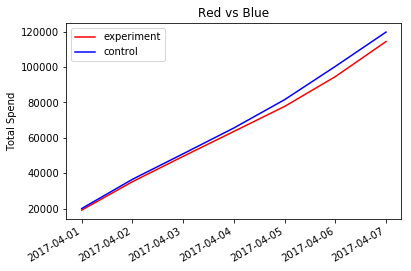

In [21]:
def GetSeries(my_data, my_id, country):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id) & (my_data.country == country)]
    series = table.groupby('date')['spend_usd'].sum()
    series = np.cumsum(series)
    total_revenue = series[-1]
    return series, total_revenue
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs Blue")
    ax.set_ylabel("Total Spend")
    ax.legend()
    plt.gcf().autofmt_xdate()
def PrintCumulativeTimeSeries(my_data, experiment_ids, country):
    index_series = np.unique(my_data.date)
    index_series = np.sort(index_series)
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetSeries(my_data, experiment_ids[0], country)[0]
    control_series = GetSeries(my_data, experiment_ids[1], country)[0]
    treatment_revenue = GetSeries(my_data, experiment_ids[0], country)[1]
    control_revenue = GetSeries(my_data, experiment_ids[1], country)[1]
    print("Cumulative impact: " + str(treatment_revenue/control_revenue*100-100) + "%")
    PlotSeries(treatment_series, control_series)
    
PrintCumulativeTimeSeries(my_data, [12624548,12624549], "US")